# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df=pd.read_excel('GermanCredit.xlsx')

# 2. Check how many records do we have


In [8]:
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 3. Plot Histogram for column 'CreditAmount'

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

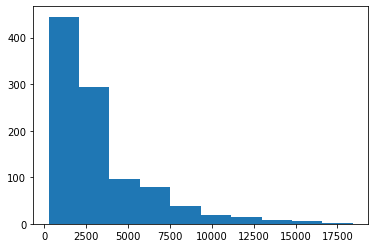

In [9]:
plt.hist(df['CreditAmount'])

# 3b. Create creditability dataframe

In [10]:
creditability=pd.DataFrame(columns = ['creditability'])

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [18]:
df.shape
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

In [11]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 6. Prepare input data for the model

In [30]:
from  sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

In [25]:
#X=df.drop('Creditability')
#y=df['Creditability']
y=df['Creditability']
x=df.drop('Creditability',axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.2)

# 7. Fit logistic regression model

In [32]:
X = sm.add_constant(x)
logreg_full = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.664706
         Iterations 4


In [34]:
y_pred_prob_full = logreg_full.predict(X_test)
print(logreg_full.summary())

                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      798
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                -0.08075
Time:                        09:06:47   Log-Likelihood:                -531.76
converged:                       True   LL-Null:                       -492.03
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CreditAmount             -2.521e-06   3.37e-05     -0.075      0.940   -6.85e-05    6.35e-05
DurationOfCreditInMonths     0.0209      0.006      3.386      0.001       0.009       0.

In [35]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# 8. Test accuracy calculation

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
print(accuracy_score(y_test, y_pred))

0.715


# 9. Build a confusion matrix

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  7,  49],
       [  8, 136]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

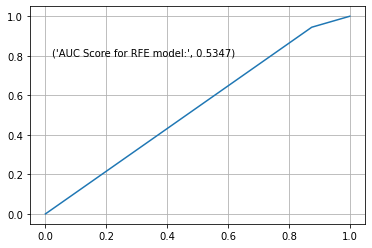

In [50]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
plt.plot(fpr1, tpr1)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for RFE model:',round(roc_auc_score(y_test, y_pred),4)))
plt.grid(True)